In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from datetime import datetime as dt


In [2]:
CEO_DF = pd.read_csv('input_data_clean/CEO_DF.csv')
BOD_DF = pd.read_csv('input_data_clean/BOD_DF.csv')

In [3]:
CEO_DF.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'GVKEY', 'TICKER', 'CEOANN', 'SALARY',
       'BONUS', 'STOCK_AWARDS', 'OPTION_AWARDS', 'OTHCOMP', 'TOTAL_CURR',
       'AGE', 'TDC1', 'YEAR', 'BECAMECEO', 'JOINED_CO', 'LEFTOFC', 'GENDER',
       'CUSIP', 'NAICSDESC', 'SIC', 'MKVALT', 'SIZE_CATEGORY',
       'signature_index', 'prestige_power'],
      dtype='object')

In [4]:
CEO_DF['BECAMECEO'] = CEO_DF['BECAMECEO'].astype('datetime64[ns]')
#CEO_DF['YEAR'] = CEO_DF['YEAR'].astype('datetime64[ns]')

In [5]:
CEO_DF.TDC1.describe()

count      5649.000000
mean      11437.585412
std        9886.781468
min           0.001000
25%        6163.953000
50%        9689.151000
75%       14439.967000
max      280621.551000
Name: TDC1, dtype: float64

In [6]:
# Note TDC1 in thousands

In [7]:
x = CEO_DF['TDC1'].quantile([0.01]).values[0]

In [8]:
x

347.00344000000024

<AxesSubplot:xlabel='TDC1', ylabel='Count'>

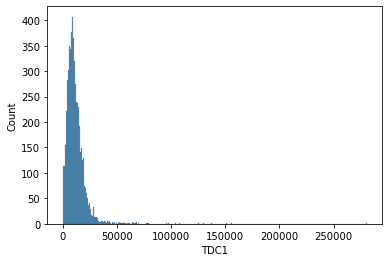

In [9]:
sns.histplot(CEO_DF['TDC1'])

In [10]:
CEO_DF = CEO_DF[CEO_DF['TDC1'] >= x]

In [11]:
CEO_DF['TDC1'].describe()

count      5592.000000
mean      11553.455173
std        9869.857317
min         374.773000
25%        6267.091000
50%        9769.551000
75%       14512.550000
max      280621.551000
Name: TDC1, dtype: float64

In [12]:
inner_merge_df = CEO_DF.merge(BOD_DF, how = 'inner',
                              on = ['TICKER', 'YEAR']).reset_index(drop=True)

In [13]:
inner_merge_df = inner_merge_df.drop(['Unnamed: 0_x','Unnamed: 0_y'], axis = 1)

In [14]:
inner_merge_df.columns

Index(['Unnamed: 0.1', 'GVKEY_x', 'TICKER', 'CEOANN', 'SALARY', 'BONUS',
       'STOCK_AWARDS_x', 'OPTION_AWARDS_x', 'OTHCOMP_x', 'TOTAL_CURR', 'AGE',
       'TDC1', 'YEAR', 'BECAMECEO', 'JOINED_CO', 'LEFTOFC', 'GENDER',
       'CUSIP_x', 'NAICSDESC', 'SIC', 'MKVALT_x', 'SIZE_CATEGORY_x',
       'signature_index_x', 'prestige_power', 'GVKEY_y', 'TOTAL_SEC',
       'OTHCOMP_y', 'NONEQ_INCENT', 'CASH_FEES', 'STOCK_AWARDS_y',
       'OPTION_AWARDS_y', 'SPCODE', 'CUSIP_y', 'CONAME', 'YEAR_y',
       'total_director_comp', 'total_OTHCOMP', 'total_NONEQ_INCENT',
       'total_CASH_FEES', 'total_STOCK_AWARDS', 'total_OPTION_AWARDS',
       'MKVALT_y', 'SIZE_CATEGORY_y', 'signature_index_y'],
      dtype='object')

In [15]:
# Determining onwership power

inner_merge_df['ownershipRatio'] = inner_merge_df['STOCK_AWARDS_x'] / inner_merge_df['total_STOCK_AWARDS']

In [16]:
inner_merge_df['ownershipRatio'].median()

5.3804094817348345

In [17]:
median = inner_merge_df['ownershipRatio'].median()

In [18]:
median

5.3804094817348345

In [19]:
inner_merge_df['ownershipRatio'].quantile([0, 0.9])


0.0      0.0000
0.9    354.0999
Name: ownershipRatio, dtype: float64

In [20]:
inner_merge_df

,Unnamed: 0.1,GVKEY_x,TICKER,CEOANN,SALARY,BONUS,STOCK_AWARDS_x,OPTION_AWARDS_x,OTHCOMP_x,TOTAL_CURR,...,total_director_comp,total_OTHCOMP,total_NONEQ_INCENT,total_CASH_FEES,total_STOCK_AWARDS,total_OPTION_AWARDS,MKVALT_y,SIZE_CATEGORY_y,signature_index_y,ownershipRatio
0,0,1045,AAL,CEO,669.646,0.0,3280.680,1185.940,94.660,669.646,...,902.555,123.658,0.0,461.0,273.774,0.0,2597.5755,Medium,30221c98bdcfd7c0ed5c8b8e84f8a2ca,11.983169
1,1,1045,AAL,CEO,613.842,0.0,4020.380,798.600,93.996,613.842,...,902.555,123.658,0.0,461.0,273.774,0.0,117.3438,Tiny,975aa09ae7be6394462a5beda7668e1d,14.685032
2,2,1045,AAL,CEO,618.135,0.0,0.000,0.000,37.458,618.135,...,902.555,123.658,0.0,461.0,273.774,0.0,266.5571,Tiny,589b2d914f25e0a1ff8f707f7aa52096,0.000000
3,3,1045,AAL,CEO,591.911,0.0,4199.761,0.000,13117.484,591.911,...,902.555,123.658,0.0,461.0,273.774,0.0,6591.9923,Medium,436a3154f7acadd68f77107364944857,15.340248
4,4,1045,AAL,CEO,687.884,0.0,7000.000,0.000,414.092,687.884,...,902.555,123.658,0.0,461.0,273.774,0.0,37405.5843,Big,dc94df973b47ec03bf615d54bd90e720,25.568535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7312,5644,316056,ALLE,CEO,938.462,0.0,2514.691,750.012,475.236,938.462,...,200.136,200.136,0.0,0.0,0.000,0.0,6327.7267,Medium,9a2552c4e1a18391ae83d6a74537a7b6,inf
7313,5645,316056,ALLE,CEO,950.000,0.0,2331.625,750.004,377.832,950.000,...,200.136,200.136,0.0,0.0,0.000,0.0,6097.5360,Medium,c5aa2527abdb80465777f4eeb1bce3fc,inf
7314,5646,316056,ALLE,CEO,950.000,0.0,2776.707,837.501,308.895,950.000,...,200.136,200.136,0.0,0.0,0.000,0.0,7563.1327,Medium,b33c9610b47875a2cebb9d47b97dd758,inf
7315,5647,316056,ALLE,CEO,950.000,0.0,3017.362,912.511,228.104,950.000,...,200.136,200.136,0.0,0.0,0.000,0.0,7543.5153,Medium,46be5701765385ac27f8a4d0adabf5f6,inf


In [21]:
inner_merge_df['ownershipPower'] = 0

In [22]:
inner_merge_df.ownershipPower[inner_merge_df.ownershipRatio > median] = 1

/var/folders/1t/r9hnt1ws3bg9x2szpm5f0ywm0000gn/T/ipykernel_84362/2027042466.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inner_merge_df.ownershipPower[inner_merge_df.ownershipRatio > median] = 1


In [23]:
inner_merge_df

,Unnamed: 0.1,GVKEY_x,TICKER,CEOANN,SALARY,BONUS,STOCK_AWARDS_x,OPTION_AWARDS_x,OTHCOMP_x,TOTAL_CURR,...,total_OTHCOMP,total_NONEQ_INCENT,total_CASH_FEES,total_STOCK_AWARDS,total_OPTION_AWARDS,MKVALT_y,SIZE_CATEGORY_y,signature_index_y,ownershipRatio,ownershipPower
0,0,1045,AAL,CEO,669.646,0.0,3280.680,1185.940,94.660,669.646,...,123.658,0.0,461.0,273.774,0.0,2597.5755,Medium,30221c98bdcfd7c0ed5c8b8e84f8a2ca,11.983169,1
1,1,1045,AAL,CEO,613.842,0.0,4020.380,798.600,93.996,613.842,...,123.658,0.0,461.0,273.774,0.0,117.3438,Tiny,975aa09ae7be6394462a5beda7668e1d,14.685032,1
2,2,1045,AAL,CEO,618.135,0.0,0.000,0.000,37.458,618.135,...,123.658,0.0,461.0,273.774,0.0,266.5571,Tiny,589b2d914f25e0a1ff8f707f7aa52096,0.000000,0
3,3,1045,AAL,CEO,591.911,0.0,4199.761,0.000,13117.484,591.911,...,123.658,0.0,461.0,273.774,0.0,6591.9923,Medium,436a3154f7acadd68f77107364944857,15.340248,1
4,4,1045,AAL,CEO,687.884,0.0,7000.000,0.000,414.092,687.884,...,123.658,0.0,461.0,273.774,0.0,37405.5843,Big,dc94df973b47ec03bf615d54bd90e720,25.568535,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7312,5644,316056,ALLE,CEO,938.462,0.0,2514.691,750.012,475.236,938.462,...,200.136,0.0,0.0,0.000,0.0,6327.7267,Medium,9a2552c4e1a18391ae83d6a74537a7b6,inf,1
7313,5645,316056,ALLE,CEO,950.000,0.0,2331.625,750.004,377.832,950.000,...,200.136,0.0,0.0,0.000,0.0,6097.5360,Medium,c5aa2527abdb80465777f4eeb1bce3fc,inf,1
7314,5646,316056,ALLE,CEO,950.000,0.0,2776.707,837.501,308.895,950.000,...,200.136,0.0,0.0,0.000,0.0,7563.1327,Medium,b33c9610b47875a2cebb9d47b97dd758,inf,1
7315,5647,316056,ALLE,CEO,950.000,0.0,3017.362,912.511,228.104,950.000,...,200.136,0.0,0.0,0.000,0.0,7543.5153,Medium,46be5701765385ac27f8a4d0adabf5f6,inf,1


In [24]:
inner_merge_df['BECAMECEO'].dt.year

0       2003.0
1       2003.0
2       2011.0
3       2011.0
4       2013.0
         ...  
7312    2013.0
7313    2013.0
7314    2013.0
7315    2013.0
7316    2013.0
Name: BECAMECEO, Length: 7317, dtype: float64

In [25]:
# Expert Power
# Create variable for years served

inner_merge_df['yearServed'] =  inner_merge_df['YEAR'] - inner_merge_df['BECAMECEO'].dt.year

In [26]:
inner_merge_df['yearServed']

0       7.0
1       8.0
2       1.0
3       2.0
4       1.0
       ... 
7312    2.0
7313    3.0
7314    4.0
7315    5.0
7316    6.0
Name: yearServed, Length: 7317, dtype: float64

In [27]:
inner_merge_df[['YEAR','BECAMECEO','yearServed']]

,YEAR,BECAMECEO,yearServed
0,2010,2003-04-25,7.0
1,2011,2003-04-25,8.0
2,2012,2011-11-28,1.0
3,2013,2011-11-28,2.0
4,2014,2013-12-09,1.0
...,...,...,...
7312,2015,2013-08-01,2.0
7313,2016,2013-08-01,3.0
7314,2017,2013-08-01,4.0
7315,2018,2013-08-01,5.0


In [28]:
inner_merge_df['prestiegePower'] = 0

In [29]:
inner_merge_df.prestiegePower[inner_merge_df.yearServed > median] = 1

/var/folders/1t/r9hnt1ws3bg9x2szpm5f0ywm0000gn/T/ipykernel_84362/1731893600.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inner_merge_df.prestiegePower[inner_merge_df.yearServed > median] = 1


In [30]:
inner_merge_df

,Unnamed: 0.1,GVKEY_x,TICKER,CEOANN,SALARY,BONUS,STOCK_AWARDS_x,OPTION_AWARDS_x,OTHCOMP_x,TOTAL_CURR,...,total_CASH_FEES,total_STOCK_AWARDS,total_OPTION_AWARDS,MKVALT_y,SIZE_CATEGORY_y,signature_index_y,ownershipRatio,ownershipPower,yearServed,prestiegePower
0,0,1045,AAL,CEO,669.646,0.0,3280.680,1185.940,94.660,669.646,...,461.0,273.774,0.0,2597.5755,Medium,30221c98bdcfd7c0ed5c8b8e84f8a2ca,11.983169,1,7.0,1
1,1,1045,AAL,CEO,613.842,0.0,4020.380,798.600,93.996,613.842,...,461.0,273.774,0.0,117.3438,Tiny,975aa09ae7be6394462a5beda7668e1d,14.685032,1,8.0,1
2,2,1045,AAL,CEO,618.135,0.0,0.000,0.000,37.458,618.135,...,461.0,273.774,0.0,266.5571,Tiny,589b2d914f25e0a1ff8f707f7aa52096,0.000000,0,1.0,0
3,3,1045,AAL,CEO,591.911,0.0,4199.761,0.000,13117.484,591.911,...,461.0,273.774,0.0,6591.9923,Medium,436a3154f7acadd68f77107364944857,15.340248,1,2.0,0
4,4,1045,AAL,CEO,687.884,0.0,7000.000,0.000,414.092,687.884,...,461.0,273.774,0.0,37405.5843,Big,dc94df973b47ec03bf615d54bd90e720,25.568535,1,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7312,5644,316056,ALLE,CEO,938.462,0.0,2514.691,750.012,475.236,938.462,...,0.0,0.000,0.0,6327.7267,Medium,9a2552c4e1a18391ae83d6a74537a7b6,inf,1,2.0,0
7313,5645,316056,ALLE,CEO,950.000,0.0,2331.625,750.004,377.832,950.000,...,0.0,0.000,0.0,6097.5360,Medium,c5aa2527abdb80465777f4eeb1bce3fc,inf,1,3.0,0
7314,5646,316056,ALLE,CEO,950.000,0.0,2776.707,837.501,308.895,950.000,...,0.0,0.000,0.0,7563.1327,Medium,b33c9610b47875a2cebb9d47b97dd758,inf,1,4.0,0
7315,5647,316056,ALLE,CEO,950.000,0.0,3017.362,912.511,228.104,950.000,...,0.0,0.000,0.0,7543.5153,Medium,46be5701765385ac27f8a4d0adabf5f6,inf,1,5.0,0


In [31]:
inner_merge_df.columns

Index(['Unnamed: 0.1', 'GVKEY_x', 'TICKER', 'CEOANN', 'SALARY', 'BONUS',
       'STOCK_AWARDS_x', 'OPTION_AWARDS_x', 'OTHCOMP_x', 'TOTAL_CURR', 'AGE',
       'TDC1', 'YEAR', 'BECAMECEO', 'JOINED_CO', 'LEFTOFC', 'GENDER',
       'CUSIP_x', 'NAICSDESC', 'SIC', 'MKVALT_x', 'SIZE_CATEGORY_x',
       'signature_index_x', 'prestige_power', 'GVKEY_y', 'TOTAL_SEC',
       'OTHCOMP_y', 'NONEQ_INCENT', 'CASH_FEES', 'STOCK_AWARDS_y',
       'OPTION_AWARDS_y', 'SPCODE', 'CUSIP_y', 'CONAME', 'YEAR_y',
       'total_director_comp', 'total_OTHCOMP', 'total_NONEQ_INCENT',
       'total_CASH_FEES', 'total_STOCK_AWARDS', 'total_OPTION_AWARDS',
       'MKVALT_y', 'SIZE_CATEGORY_y', 'signature_index_y', 'ownershipRatio',
       'ownershipPower', 'yearServed', 'prestiegePower'],
      dtype='object')

In [32]:
final_df = inner_merge_df[['GVKEY_x', 'TICKER','AGE', 'TDC1', 'YEAR','BECAMECEO',
                         'STOCK_AWARDS_x', 'STOCK_AWARDS_y', 'ownershipRatio',
                        'ownershipPower', 'yearServed', 'prestiegePower',
                          'SIZE_CATEGORY_x', 'MKVALT_x']]

In [33]:
final_df

,GVKEY_x,TICKER,AGE,TDC1,YEAR,BECAMECEO,STOCK_AWARDS_x,STOCK_AWARDS_y,ownershipRatio,ownershipPower,yearServed,prestiegePower,SIZE_CATEGORY_x,MKVALT_x
0,1045,AAL,51.0,5231.393,2010,2003-04-25,3280.680,24.103,11.983169,1,7.0,1,Medium,2597.5755
1,1045,AAL,52.0,5526.835,2011,2003-04-25,4020.380,13.811,14.685032,1,8.0,1,Tiny,117.3438
2,1045,AAL,50.0,656.226,2012,2011-11-28,0.000,0.000,0.000000,0,1.0,0,Tiny,266.5571
3,1045,AAL,51.0,19092.978,2013,2011-11-28,4199.761,0.000,15.340248,1,2.0,0,Medium,6591.9923
4,1045,AAL,52.0,12301.976,2014,2013-12-09,7000.000,280.000,25.568535,1,1.0,0,Big,37405.5843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7312,316056,ALLE,57.0,6554.281,2015,2013-08-01,2514.691,70.056,inf,1,2.0,0,Medium,6327.7267
7313,316056,ALLE,58.0,6254.577,2016,2013-08-01,2331.625,70.008,inf,1,3.0,0,Medium,6097.5360
7314,316056,ALLE,59.0,6530.474,2017,2013-08-01,2776.707,0.000,inf,1,4.0,0,Medium,7563.1327
7315,316056,ALLE,60.0,6913.202,2018,2013-08-01,3017.362,100.033,inf,1,5.0,0,Medium,7543.5153


In [34]:
final_df.to_csv('input_data_clean/CEO_BOD_Merged.csv')